# Joint Collaborative Research and Development Project 
# Remote Sensing data collection and visualization:
- Datasets
- Visualizations
- Analysis

### Table of Contents
- Pandora
- AERONET
- Ceilometer
- TOLNet
- MPLNET

### AEROSOL ROBOTIC NETWORK (AERONET) - CIMEL Sunphotometers
- Homepage: https://aeronet.gsfc.nasa.gov/
- DataDownload: https://aeronet.gsfc.nasa.gov/cgi-bin/webtool_inv_v3
- DataDisplay: https://aeronet.gsfc.nasa.gov/cgi-bin/data_display_inv_v3

In [131]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
AERONET = {}
dirpath = r"C:\Users\Magnolia\OneDrive - UMBC\Research\Analysis\DATAS\JCRD\data\aeronet"
for filepath in Path(dirpath).glob("*.all"):
    with open(filepath, "r") as f:
        content = f.readlines()
        site_line = content[1].strip()
        header_line = None

        for i, line in enumerate(content):
            if site_line in line and i > 2:
                skiprows = i-1
                break
                
    AERONET[filepath.stem] = pd.read_csv(filepath, sep=",", skiprows=skiprows)

In [128]:
cols = AERONET[filepath.stem].columns

def print_columns_in_four(ls, columns_per_row):
    num_columns = len(ls)
    max_len = max(len(l) for l in ls) + 6
    for i in range(0, num_columns, columns_per_row):
        row = ls[i:i + columns_per_row]
        formatted_row = [
            f"({i+j+1}) {col:<{max_len}}" for j, col in enumerate(row)
        ]
        print("\t".join(formatted_row))

print_columns_in_four(cols, 3)

(1) Site                                                           	(2) Date(dd:mm:yyyy)                                               	(3) Time(hh:mm:ss)                                                 
(4) Day_of_Year                                                    	(5) Day_of_Year(Fraction)                                          	(6) AOD_Coincident_Input[440nm]                                    
(7) AOD_Coincident_Input[675nm]                                    	(8) AOD_Coincident_Input[870nm]                                    	(9) AOD_Coincident_Input[1020nm]                                   
(10) Angstrom_Exponent_440-870nm_from_Coincident_Input_AOD          	(11) AOD_Extinction-Total[440nm]                                    	(12) AOD_Extinction-Total[675nm]                                    
(13) AOD_Extinction-Total[870nm]                                    	(14) AOD_Extinction-Total[1020nm]                                   	(15) AOD_Extinction-Fine[440nm]            

### Pandora Spectrometer (Pandonia Network)

https://www.pandonia-global-network.org/

# Introduction to Datasets

### Ceilometer

#### Import Ceilometer Data

To make this plot better we need to have a datetime axis, a tittle, a legend, etc. 

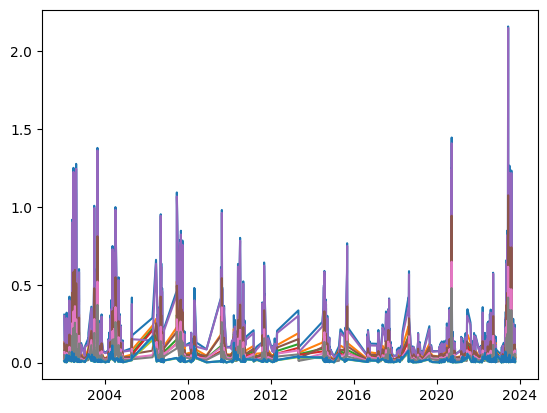

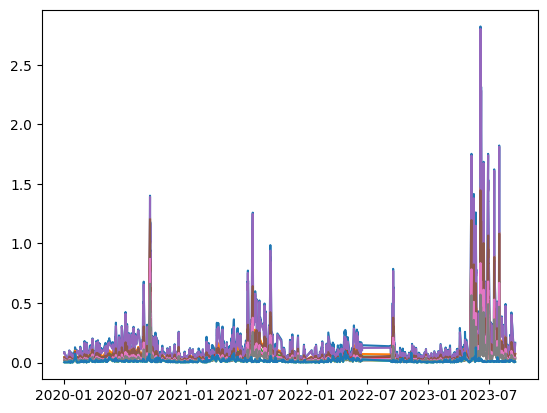

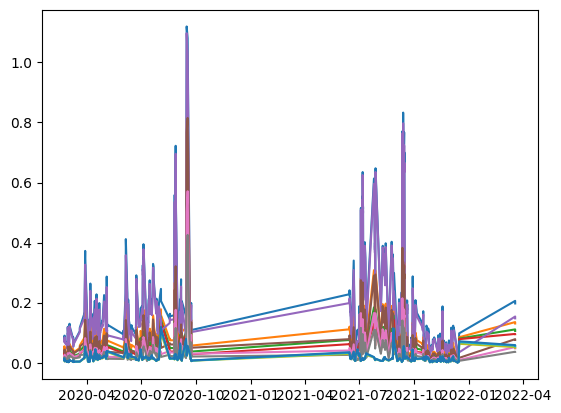

In [190]:

for key in AERONET.keys():
    plt.figure()
    for col in cols[10:21]:
        plt.plot(AERONET[key][col])
    plt.show()

In [168]:
for key in AERONET.keys(): 
    # The format is Date(dd:mm:yyyy) Time(hh:mm:ss). Lets also make it timezone aware. utc=True
    AERONET[key]["Datetime"] = pd.to_datetime(AERONET[key][cols[1]] + " " + AERONET[key][cols[2]], format="%d:%m:%Y %H:%M:%S", utc=True)

In [169]:
AERONET[key].index[-1]

Timestamp('2022-03-19 14:26:11+0000', tz='UTC')

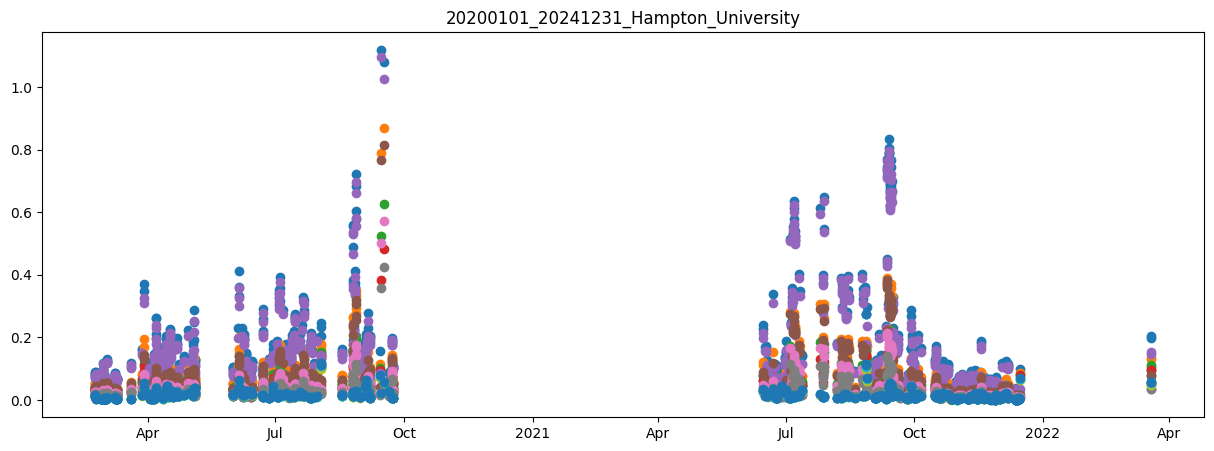

In [170]:
import matplotlib.dates as mdates
import matplotlib.units as munits
from datetime import datetime

fig, ax = plt.subplots(figsize=(15,5))
for col in cols[10:21]:
    # X-axis is time: "Datetime" - Y-axis is AOD columns (i.e. cols)
    # label is col: For legend
    ax.scatter(AERONET[filepath.stem]["Datetime"], AERONET[filepath.stem][col], label=col)

plt.legend
ax.set_title(filepath.stem)

converter = mdates.ConciseDateConverter()
munits.registry[datetime] = converter

ax.xaxis_date()
plt.show()

If we set the index to the :"Datetime" column then we can do datetime slicing with the pandas Dataframe. Thus, zoom into a specific date range.

In [156]:
for key in AERONET.keys(): 
    AERONET[key].set_index("Datetime", inplace=True)

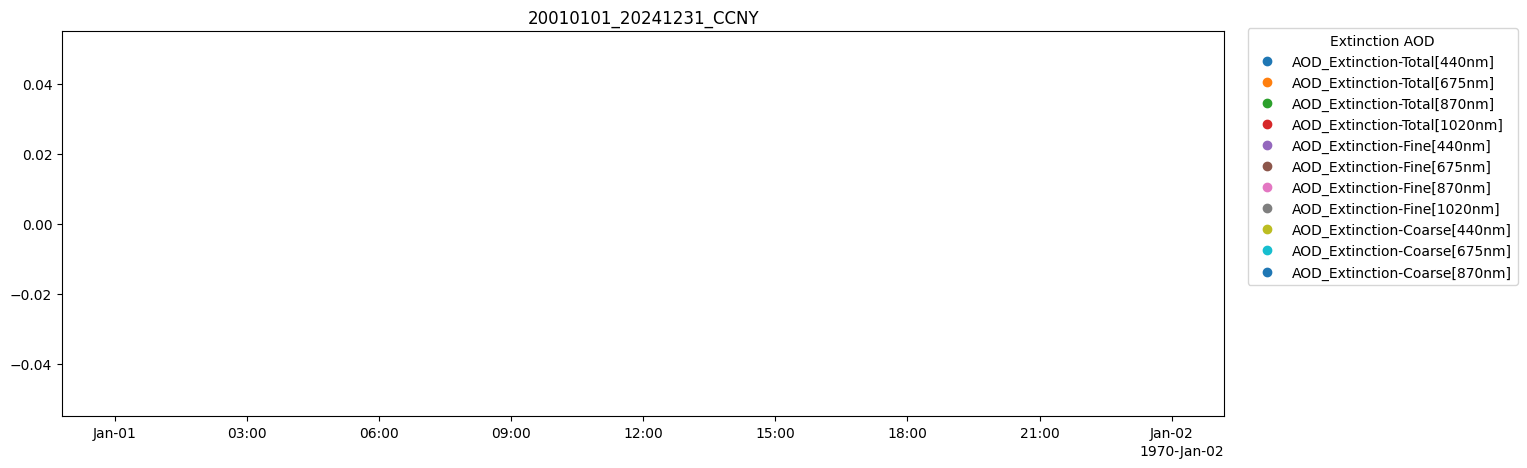

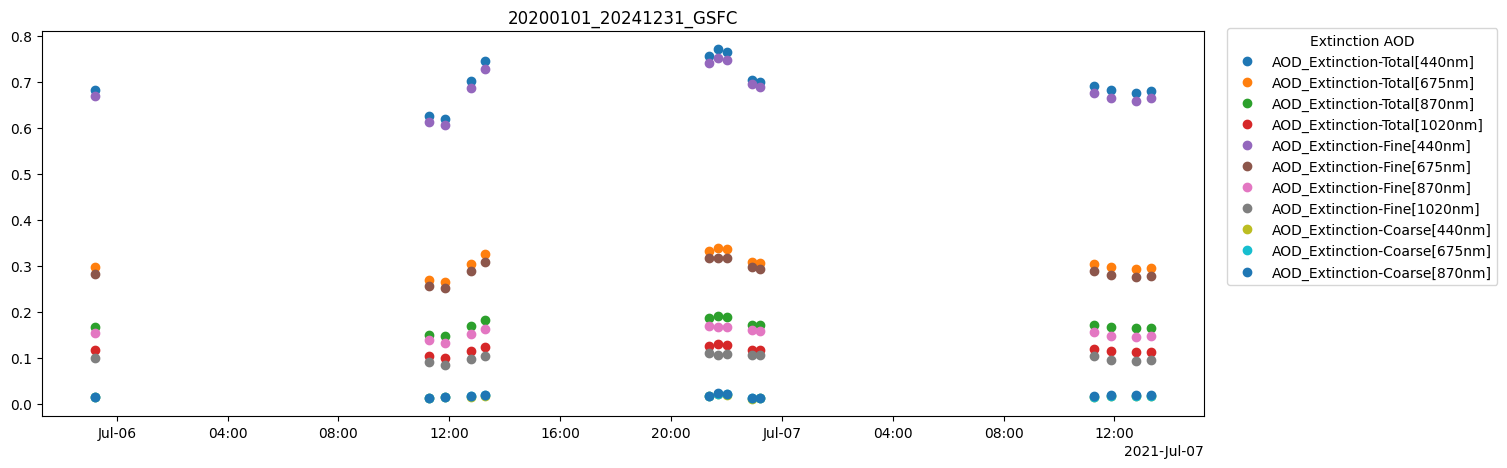

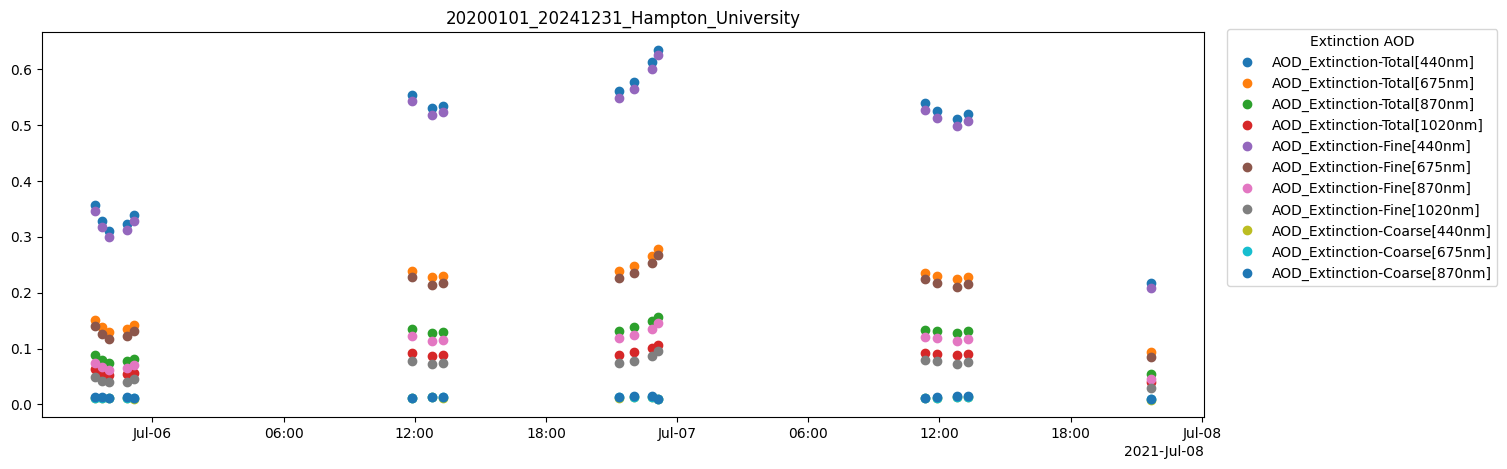

In [187]:
date_range = ["2021-07-05", "2021-07-08"]

for key in AERONET.keys():
    fig, ax = plt.subplots(figsize=(15,5))
    for col in cols[10:21]:
        # X-axis is time: "Datetime" - Y-axis is AOD columns (i.e. cols)
        # label is col: For legend
        ax.plot(AERONET[key][col][date_range[0]:date_range[1]], marker="o", linestyle="", label=col)
    
    fig.legend(bbox_to_anchor=(1.1, 0.9), title="Extinction AOD")
    ax.set_title(key)
    
    converter = mdates.ConciseDateConverter()
    munits.registry[datetime] = converter
    
    ax.xaxis_date()
    plt.show()

### Lidar Curtains
- The basics: What data do you use for plotting?
- Editting the Colobar: Colobar types, vmin & vmax, expressing features
- pcolormesh vs contourf (& contour) vs imshow

### PLotting Time Series
- The basics: What data to plot, Pandora (Chem) & AERONET (AOD)
- Temporal Averaging
- Multiple-Axis

### Publications
- Acknowledgements
    - AERONEt: https://aeronet.gsfc.nasa.gov/new_web/data_usage.html
- Coloblind Complient
- Publication Worthy: Scaling, Saving, and Neatness

### Datasets
- Text Files
- NetCDF Files
- JSON Files
- Pandora Files
- Ceilometer Files
- TOLNet Files
- MPLNET Files
- AERONET Files
- Storing your own Datasets: Databases, Parquet Files, Pickle Files, etc.

In [ ]:
# Function Space
def importing_ceilometer(FilePaths, variables=None, LT=None, **kwargs):
    data = {} # all data will be stored into a nested dictionary
    files = {}
    FilePaths = [Path(filePath) for filePath in FilePaths] # converting to Pathlib objects

    for filePath in FilePaths:
        if filePath.is_file() is False:
            print('PATH IS NOT FOUND ON MACHINE')
            return

        fileName = filePath.name
        data[fileName] = {} # Nested Dictionary
        with xr.open_dataset(filePath) as file: # importing data as a xarrays instance
            data[fileName]["datetime"] = file.time.values
            data[fileName]["dateNum"] = np.array([mdates.date2num(t) for t in data[fileName]["datetime"]])
            if LT: data[fileName]["dateNum"] = data[fileName]["dateNum"] + (LT/24)
            data[fileName]["range"] = file.range.values
            data[fileName]["beta_raw"] = file.beta_raw.values
            data[fileName]["beta_raw"][data[fileName]["beta_raw"] == 0] = np.nan
            data[fileName]["beta_raw"] = data[fileName]["beta_raw"].T
            data[fileName]["instrument_pbl"] = file.pbl.values
            data[fileName]["lat_lon_alt"] = [file.longitude.values, file.latitude.values, file.altitude.values]

            if "vars" in kwargs.keys():
                for var in kwargs["vars"]:
                    data[fileName][var] = file[var].values

            data[fileName]["datasets"] = list(file.keys())
            files[fileName] = file

    return data, files

def plot(data,
         clims=[10**4, 10**6],
         cticks=np.arange(10**4, 10**6, (10**6 - 10**4) / 5),
         xlabel="Datetime (UTC)",
         **kwargs):

    if "figsize" in kwargs.keys():
        figsize = kwargs["figsize"]
    else: 
        figsize = (15, 8)
        
    fig, ax = plt.subplots(figsize=figsize)

    for key in data.keys():
        X, Y, Z = (data[key]["dateNum"], data[key]["range"].flatten()/1000, np.abs(data[key]["beta_raw"]))
        im = ax.pcolormesh(X, Y, Z, cmap="viridis", shading="nearest", norm=LogNorm(vmin=clims[0], vmax=clims[1]))
        # im = ax.pcolormesh(X, Y, Z, cmap="viridis", shading="nearest", vmin=0, vmax=10**5)
        # im = ax.imshow(Z, vmin=0,vmax=1e5, origin='lower',aspect=5)
    cbar = fig.colorbar(im, ax=ax, pad=0.01, ticks=cticks)
    if "cbar_label" in kwargs.keys():
        cbar_label = kwargs["cbar_label"]
    else: 
        cbar_label = r"Atmospheric Backscatter ($log_{10}$)"
        
    cbar.set_label(label=cbar_label, size=16, weight="bold")

    if "title" in kwargs.keys():
        plt.title(kwargs["title"], fontsize=20)
    else: plt.title(r"Ceilometer Backscatter", fontsize=20)

    ax.set_ylabel("Altitude (km AGL)", fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)

    if "xlims" in kwargs.keys():
        lim = kwargs["xlims"]
        lims = [np.datetime64(lim[0]), np.datetime64(lim[-1])]
        ax.set_xlim(lims)

    if "ylims" in kwargs.keys():
        ax.set_ylim(kwargs["ylims"])

    if "yticks" in kwargs.keys():
        ax.set_yticks(kwargs["yticks"])
        
    if "overlay" in kwargs.keys():
        ax.contour(kwargs["overlay"]["X"], kwargs["overlay"]["Y"], kwargs["overlay"]["Z"], colors='pink', linewidths=2)
        
    plt.setp(ax.get_yticklabels(), fontsize=16)
    plt.setp(ax.get_xticklabels(), fontsize=16)
    cbar.ax.tick_params(labelsize=16)

    converter = mdates.ConciseDateConverter()
    munits.registry[datetime] = converter

    ax.xaxis_date()
    
    if "target" in kwargs.keys():
        #add rectangle to plot
        ax.add_patch(Rectangle(*kwargs["target"],
             edgecolor = 'pink',
             fill=False,
             lw=1))
        
    if "savefig" in kwargs.keys():
        plt.savefig(f"{kwargs['savefig']}", dpi=300)

    plt.show()

    return (X, Y, Z)

### Snapshot Plots
- Lidar Profiles
- Size Distribution
- Multiple-Subplots

Acknowledgments

The PGN provides data free to the public. In return, we ask that you follow the PGN data use guidelines. The PGN data are provided by an international group of researchers with a variety of affiliations and institutional support. Each site has a Principal Investigator (PI) and local operators, responsible for deployment, maintenance and data collection. The PI and local operators have invested considerable effort in the production of the data and they are entitled to be informed of any use of data produced by that site. 

Using PGN data
We suggest consulting with the PI(s) of the instruments about the data to be used, if there are specific questions or apparent issues with the data. While we make an effort to ensure uniformly high data quality, each PGN instrument has a unique location that can affect the representativeness of the data. The PI may have information about the local environment of an instrument that is important in your analysis.

Publishing PGN data
Co-authorship
We recognize that it is entirely the decision of the primary author of a manuscript to decide upon co-authors. We suggest that if the PGN data from a few sites are a major component of the paper then co-authorship to PI(s) be offered. In the event that co-authorship is not justified, an acknowledgment is sufficient. If PGN data are used in combination with data from other sources and co-authorship is offered to their PIs, then co-authorship should also be offered to the PGN PIs.

Example acknowledgments
Example acknowledgment when using PGN data from a ‘few’ sites:

“We thank PI(s) and staff for their effort in establishing and maintaining (site name(s)) sites and (Agency) for funding.”

Example acknowledgment when using data from ‘many’ sites:

“We thank the PI(s), support staff and funding for establishing and maintaining the (#) sites of the PGN used in this investigation.”

In all cases to be added to the acknowledgment
“The PGN is a bilateral project supported with funding from NASA and ESA.”